In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('flightAll.csv')
print('The shape of the dataset is:', df.shape)

df.head(15)

The shape of the dataset is: (103237, 70)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,1,1,6,7,2019-01-06,DL,DL_CODESHARE,19790,DL,...,71.0,46.0,1,236,1,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,6,7,2019-01-06,DL,DL_CODESHARE,19790,DL,...,67.0,48.0,1,236,1,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,8,2,2019-01-08,DL,DL_CODESHARE,19790,DL,...,61.0,43.0,1,236,1,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,8,2,2019-01-08,DL,DL_CODESHARE,19790,DL,...,80.0,45.0,1,236,1,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,20,7,2019-01-20,DL,DL_CODESHARE,19790,DL,...,61.0,43.0,1,236,1,NaN,NaN,NaN,NaN,NaN
5,2019,1,1,20,7,2019-01-20,DL,DL_CODESHARE,19790,DL,...,78.0,49.0,1,236,1,NaN,NaN,NaN,NaN,NaN
6,2019,1,1,21,1,2019-01-21,DL,DL_CODESHARE,19790,DL,...,64.0,44.0,1,236,1,NaN,NaN,NaN,NaN,NaN
7,2019,1,1,21,1,2019-01-21,DL,DL_CODESHARE,19790,DL,...,98.0,48.0,1,236,1,NaN,NaN,NaN,NaN,NaN
8,2019,1,1,21,1,2019-01-21,UA,UA_CODESHARE,19977,UA,...,73.0,47.0,1,236,1,NaN,NaN,NaN,NaN,NaN
9,2019,1,1,22,2,2019-01-22,DL,DL_CODESHARE,19790,DL,...,70.0,47.0,1,236,1,NaN,NaN,NaN,NaN,NaN


# Pie Chart Of Each Delay Reason/Total delays (in minutes)

In [32]:
flights = df[["FlightDate", "DayOfWeek", "Marketing_Airline_Network", 
              "DOT_ID_Marketing_Airline", "Flight_Number_Marketing_Airline", 
              "IATA_Code_Marketing_Airline", "Operating_Airline" , "IATA_Code_Operating_Airline",
              "Flight_Number_Operating_Airline", "Tail_Number",
              "OriginAirportID", "Origin", "Dest", "DestAirportID", "DepDelay", 
              "DepDelayMinutes", "DepartureDelayGroups", "ArrDelay", "ArrDelayMinutes", 
              "ArrivalDelayGroups", "Cancelled","CancellationCode", "CarrierDelay", 
              "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
flights.head(5)

,FlightDate,DayOfWeek,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,IATA_Code_Marketing_Airline,Operating_Airline,IATA_Code_Operating_Airline,Flight_Number_Operating_Airline,Tail_Number,...,ArrDelay,ArrDelayMinutes,ArrivalDelayGroups,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019-01-06,7,DL,19790,3542,DL,OO,OO,3542,N242SY,...,-8.0,0.0,-1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-06,7,DL,19790,3613,DL,OO,OO,3613,N252SY,...,3.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-08,2,DL,19790,3542,DL,OO,OO,3542,N251SY,...,-21.0,0.0,-2.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-08,2,DL,19790,3613,DL,OO,OO,3613,N258SY,...,-5.0,0.0,-1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-20,7,DL,19790,3612,DL,OO,OO,3612,N241SY,...,-17.0,0.0,-2.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
GenDelaySummary = flights.copy()
DelayReasons = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]

data = GenDelaySummary[DelayReasons].sum()
print("delay minutes for each reason: ", data)
Sum = data.sum()
print("total delay minutes: ", Sum)

DelaySummary = pd.DataFrame([data/Sum], columns=DelayReasons)
DelaySummary.head()

delay minutes for each reason:  CarrierDelay         388151.0
WeatherDelay          26938.0
NASDelay             234715.0
SecurityDelay          3150.0
LateAircraftDelay    510250.0
dtype: float64
total delay minutes:  1163204.0


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.333691,0.023158,0.201783,0.002708,0.438659


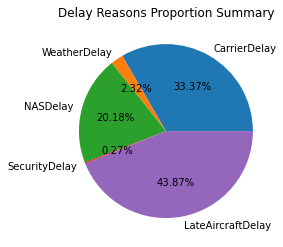

In [73]:
labels = DelayReasons
sizes = data/Sum

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Delay Reasons Proportion Summary')
plt.show()

In [91]:
LaxDelaySummary = GenDelaySummary[(GenDelaySummary['Dest'] == 'LAX')]

Laxdata = LaxDelaySummary[DelayReasons].sum()
print("delay minutes for each reason LAX: ", Laxdata)
LaxSum = Laxdata.sum()
print("total delay minutes: ", LaxSum)

DelaySummaryla = pd.DataFrame([Laxdata/LaxSum], columns=DelayReasons)
#LaxDelaySummary.head(15)
DelaySummaryla.head()

delay minutes for each reason LAX:  CarrierDelay         204391.0
WeatherDelay          14571.0
NASDelay              94657.0
SecurityDelay          1609.0
LateAircraftDelay    294260.0
dtype: float64
total delay minutes:  609488.0


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.335349,0.023907,0.155306,0.00264,0.482799


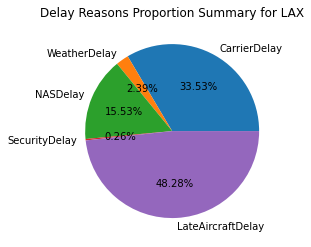

In [92]:
sizesla = Laxdata/LaxSum

plt.pie(sizesla, labels=labels, autopct='%1.2f%%')
plt.title('Delay Reasons Proportion Summary for LAX')
plt.show()

In [93]:
LasDelaySummary = GenDelaySummary[(GenDelaySummary['Dest'] == 'LAS')]

Lasdata = LasDelaySummary[DelayReasons].sum()
print("delay minutes for each reason LAS: ", Lasdata)
LasSum = Lasdata.sum()
print("total delay minutes: ", LasSum)

DelaySummarylv = pd.DataFrame([Lasdata/LasSum], columns=DelayReasons)
#LaxDelaySummary.head(15)
DelaySummarylv.head()

delay minutes for each reason LAS:  CarrierDelay         183760.0
WeatherDelay          12367.0
NASDelay             140058.0
SecurityDelay          1541.0
LateAircraftDelay    215990.0
dtype: float64
total delay minutes:  553716.0


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.331867,0.022335,0.252942,0.002783,0.390074


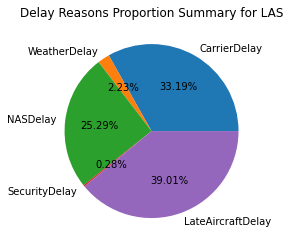

In [94]:
sizeslv = Lasdata/LasSum

plt.pie(sizeslv, labels=labels, autopct='%1.2f%%')
plt.title('Delay Reasons Proportion Summary for LAS')
plt.show()

# Curve Chart

In [89]:
flights2 = df[["Year", "Quarter", "Month", "DayofMonth", "FlightDate", "DayOfWeek", "Marketing_Airline_Network", 
              "DOT_ID_Marketing_Airline", "Flight_Number_Marketing_Airline", 
              "IATA_Code_Marketing_Airline", "Operating_Airline" , "IATA_Code_Operating_Airline",
              "Flight_Number_Operating_Airline", "Tail_Number",
              "OriginAirportID", "Origin", "Dest", "DestAirportID", "DepDelay", 
              "DepDelayMinutes", "DepartureDelayGroups", "ArrDelay", "ArrDelayMinutes", 
              "ArrivalDelayGroups", "Cancelled","CancellationCode", "CarrierDelay", 
              "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
flights2.head()

,Year,Quarter,Month,DayofMonth,FlightDate,DayOfWeek,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,IATA_Code_Marketing_Airline,...,ArrDelay,ArrDelayMinutes,ArrivalDelayGroups,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,1,1,6,2019-01-06,7,DL,19790,3542,DL,...,-8.0,0.0,-1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,6,2019-01-06,7,DL,19790,3613,DL,...,3.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,8,2019-01-08,2,DL,19790,3542,DL,...,-21.0,0.0,-2.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,8,2019-01-08,2,DL,19790,3613,DL,...,-5.0,0.0,-1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,20,2019-01-20,7,DL,19790,3612,DL,...,-17.0,0.0,-2.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
minutes2018 = flights2[(flights2['Year'] == 2018)][DelayReasons].sum()
print("delay minutes for 2018: ", minutes2018)
Sum2018 = minutes2018.sum()
print("total delay minutes: ", Sum2018)
percentage2018 = np.array([minutes2018/Sum2018])
print("percentage of 2018: ", percentage2018)

minutes2019_1 = flights2[(flights2['Year'] == 2019) & (flights2['Month'] <= 6)][DelayReasons].sum()
Sum2019_1 = minutes2019_1.sum()
percentage2019_1 = np.array([minutes2019_1/Sum2019_1])

minutes2019_2 = flights2[(flights2['Year'] == 2019) & (flights2['Month'] >= 7)][DelayReasons].sum()
Sum2019_2 = minutes2019_2.sum()
percentage2019_2 = np.array([minutes2019_2/Sum2019_2])

minutes2020_1 = flights2[(flights2['Year'] == 2020) & (flights2['Month'] <= 6)][DelayReasons].sum()
Sum2020_1 = minutes2020_1.sum()
percentage2020_1 = np.array([minutes2020_1/Sum2020_1])

minutes2020_2 = flights2[(flights2['Year'] == 2020) & (flights2['Month'] >= 7)][DelayReasons].sum()
Sum2020_2 = minutes2020_2.sum()
percentage2020_2 = np.array([minutes2020_2/Sum2020_2])

minutes2021_1 = flights2[(flights2['Year'] == 2021) & (flights2['Month'] <= 6)][DelayReasons].sum()
Sum2021_1 = minutes2021_1.sum()
percentage2021_1 = np.array([minutes2021_1/Sum2021_1])

minutes2021_2 = flights2[(flights2['Year'] == 2021) & (flights2['Month'] >= 7)][DelayReasons].sum()
Sum2021_2 = minutes2021_2.sum()
percentage2021_2 = np.array([minutes2021_2/Sum2021_2])

minutes2022_1 = flights2[(flights2['Year'] == 2022) & (flights2['Month'] <= 6)][DelayReasons].sum()
Sum2022_1 = minutes2022_1.sum()
percentage2022_1 = np.array([minutes2022_1/Sum2022_1])

minutes2022_2 = flights2[(flights2['Year'] == 2022) & (flights2['Month'] >= 7)][DelayReasons].sum()
Sum2022_2 = minutes2022_2.sum()
percentage2022_2 = np.array([minutes2022_2/Sum2022_2])

minutes2023 = flights2[(flights2['Year'] == 2023)][DelayReasons].sum()
Sum2023 = minutes2023.sum()
percentage2023 = np.array([minutes2023/Sum2023])

percentages = np.concatenate((percentage2018, percentage2019_1, percentage2019_2, 
                         percentage2020_1, percentage2020_2, percentage2021_1, 
                         percentage2021_2, percentage2022_1, percentage2022_2, percentage2023))
print(percentages)

DelayBySemiYears = pd.DataFrame(percentages, columns=DelayReasons)
DelayBySemiYears.head(10)

delay minutes for 2018:  CarrierDelay         52177.0
WeatherDelay          1597.0
NASDelay             27515.0
SecurityDelay           65.0
LateAircraftDelay    67100.0
dtype: float64
total delay minutes:  148454.0
percentage of 2018:  [[3.51469142e-01 1.07575411e-02 1.85343608e-01 4.37846067e-04
  4.51991863e-01]]
[[3.51469142e-01 1.07575411e-02 1.85343608e-01 4.37846067e-04
  4.51991863e-01]
 [2.65786520e-01 1.31773957e-02 2.13858279e-01 2.61687575e-03
  5.04560929e-01]
 [3.26446580e-01 8.77397563e-03 1.88258474e-01 7.55961237e-04
  4.75765009e-01]
 [2.81843700e-01 2.44904601e-02 2.79809609e-01 4.78011472e-03
  4.09076116e-01]
 [5.76864430e-01 6.48045467e-02 4.63681730e-02 2.70307735e-03
  3.09259773e-01]
 [4.39446298e-01 4.53428680e-02 9.43411302e-02 2.45690430e-03
  4.18412800e-01]
 [4.45124639e-01 5.62262702e-02 1.39634259e-01 5.86579071e-03
  3.53149041e-01]
 [4.16178782e-01 3.86422120e-02 1.35718357e-01 3.74764693e-03
  4.05713003e-01]
 [2.89084656e-01 1.16958085e-02 2.63152900

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.351469,0.010758,0.185344,0.000438,0.451992
1,0.265787,0.013177,0.213858,0.002617,0.504561
2,0.326447,0.008774,0.188258,0.000756,0.475765
3,0.281844,0.024490,0.279810,0.004780,0.409076
4,0.576864,0.064805,0.046368,0.002703,0.309260
5,0.439446,0.045343,0.094341,0.002457,0.418413
6,0.445125,0.056226,0.139634,0.005866,0.353149
7,0.416179,0.038642,0.135718,0.003748,0.405713
8,0.289085,0.011696,0.263153,0.003601,0.432466
9,0.254337,0.017997,0.264920,0.001490,0.461257


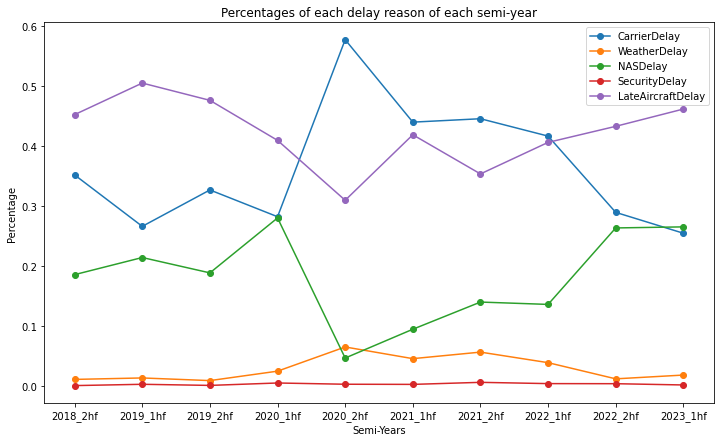

In [123]:
#data = np.array([[1, 2, 3, 4, 5], [2, 4, 6, 8, 10]])
Time = ['2018_2hf', '2019_1hf', '2019_2hf', '2020_1hf', '2020_2hf',
        '2021_1hf', '2021_2hf', '2022_1hf', '2022_2hf','2023_1hf']

x = Time
y = percentages

GraphLabels = DelayReasons

fig,ax=plt.subplots(figsize=(12,7))
ax.plot(x, y,label=GraphLabels,marker='o')

ax.set_xlabel('Semi-Years')
ax.set_ylabel('Percentage')
ax.set_title('Percentages of each delay reason of each semi-year')
ax.legend()
plt.show()


# Percentages of times of each delay reason contributes to the delay (including unkown reasons)

In [141]:
flights3 = flights2[(flights['ArrDelayMinutes'] > 0)]
print(flights3.shape)
flights3.head(5)

(35729, 31)


,Year,Quarter,Month,DayofMonth,FlightDate,DayOfWeek,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,IATA_Code_Marketing_Airline,...,ArrDelay,ArrDelayMinutes,ArrivalDelayGroups,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2019,1,1,6,2019-01-06,7,DL,19790,3613,DL,...,3.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,1,1,20,2019-01-20,7,DL,19790,3613,DL,...,1.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,1,1,21,2019-01-21,1,DL,19790,3613,DL,...,14.0,14.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
13,2019,1,1,23,2019-01-23,3,DL,19790,3613,DL,...,112.0,112.0,7.0,0,NaN,0.0,0.0,0.0,0.0,112.0
17,2019,1,1,28,2019-01-28,1,DL,19790,3613,DL,...,1.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# a=(flights3[(flights3['CarrierDelay'] > 0)].shape)[0]/(flights3.shape)[0]
# print(f'CarrierDelays:{a:.3f}')
print('CarrierDelay: ' + str((flights3[(flights3['CarrierDelay'] > 0)].shape)[0]/(flights3.shape)[0]))
print('WeatherDelay: ' + str((flights3[(flights3['WeatherDelay'] > 0)].shape)[0]/(flights3.shape)[0]))
print('NASDelay: ' + str((flights3[(flights3['NASDelay'] > 0)].shape)[0]/(flights3.shape)[0]))
print('SecurityDelay: ' + str((flights3[(flights3['SecurityDelay'] > 0)].shape)[0]/(flights3.shape)[0]))
print('LateAircraftDelay: ' + str((flights3[(flights3['LateAircraftDelay'] > 0)].shape)[0]/(flights3.shape)[0]))
print('Unkown reasons: ' +str((flights3[(flights3['LateAircraftDelay'].isna())].shape)[0]/(flights3.shape)[0])) #as according to the dataset we have, if one reaons is na, the other reasons are na too

CarrierDelay: 0.28968065157155254
WeatherDelay: 0.0135744073441742
NASDelay: 0.26074057488314817
SecurityDelay: 0.0022110890313190965
LateAircraftDelay: 0.2921156483528786
Unkown reasons: 0.4622855383581964


In [184]:
LaxDelayTimes = flights3[(flights3['Dest'] == 'LAX')]
print(LaxDelayTimes.shape)

cd = (LaxDelayTimes[(LaxDelayTimes['CarrierDelay'] > 0)].shape)[0]/(LaxDelayTimes.shape)[0]
wd = (LaxDelayTimes[(LaxDelayTimes['WeatherDelay'] > 0)].shape)[0]/(LaxDelayTimes.shape)[0]
nd = (LaxDelayTimes[(LaxDelayTimes['NASDelay'] > 0)].shape)[0]/(LaxDelayTimes.shape)[0]
sd = (LaxDelayTimes[(LaxDelayTimes['SecurityDelay'] > 0)].shape)[0]/(LaxDelayTimes.shape)[0]
lad = (LaxDelayTimes[(LaxDelayTimes['LateAircraftDelay'] > 0)].shape)[0]/(LaxDelayTimes.shape)[0]
ur = (LaxDelayTimes[(LaxDelayTimes['LateAircraftDelay'].isna())].shape)[0]/(LaxDelayTimes.shape)[0]
print('CarrierDelay: ' + str(cd))
print('WeatherDelay: ' + str(wd))
print('NASDelay: ' + str(nd))
print('SecurityDelay: ' + str(sd))
print('LateAircraftDelay: ' + str(lad))
print('Unkown reasons: ' +str(ur))

(18008, 31)
CarrierDelay: 0.2909817858729454
WeatherDelay: 0.014604620168813861
NASDelay: 0.2525544202576633
SecurityDelay: 0.0024433585073300756
LateAircraftDelay: 0.3130275433140826
Unkown reasons: 0.4636828076410484


In [185]:
LasDelayTimes = flights3[(flights3['Dest'] == 'LAS')]
print(LasDelayTimes.shape)

cd2 = (LasDelayTimes[(LasDelayTimes['CarrierDelay'] > 0)].shape)[0]/(LasDelayTimes.shape)[0]
wd2 = (LasDelayTimes[(LasDelayTimes['WeatherDelay'] > 0)].shape)[0]/(LasDelayTimes.shape)[0]
nd2 = (LasDelayTimes[(LasDelayTimes['NASDelay'] > 0)].shape)[0]/(LasDelayTimes.shape)[0]
sd2 = (LasDelayTimes[(LasDelayTimes['SecurityDelay'] > 0)].shape)[0]/(LasDelayTimes.shape)[0]
lad2 = (LasDelayTimes[(LasDelayTimes['LateAircraftDelay'] > 0)].shape)[0]/(LasDelayTimes.shape)[0]
ur2 = (LasDelayTimes[(LasDelayTimes['LateAircraftDelay'].isna())].shape)[0]/(LasDelayTimes.shape)[0]
print('CarrierDelay: ' + str(cd2))
print('WeatherDelay: ' + str(wd2))
print('NASDelay: ' + str(nd2))
print('SecurityDelay: ' + str(sd2))
print('LateAircraftDelay: ' + str(lad2))
print('Unkown reasons: ' +str(ur2))

(17721, 31)
CarrierDelay: 0.2883584447830258
WeatherDelay: 0.012527509734213646
NASDelay: 0.2690593081654534
SecurityDelay: 0.0019750578409796285
LateAircraftDelay: 0.27086507533434906
Unkown reasons: 0.46086563963658933


In [ ]:
#DelaySummary.to_csv('DelaySummary.csv', index=False)
#DelaySummaryla.to_csv('DelaySummaryla.csv', index=False)
#DelaySummarylv.to_csv('DelaySummarylv.csv', index=False)
#DelayBySemiYears.to_csv('DelayBySemiYears.csv', index=False)